In [205]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import ProbabilisticParcellation.functional_profiles as fp
from ProbabilisticParcellation.scripts.atlas_paper.ridge_reg import ridgeFit

from Functional_Fusion.dataset import *
import matplotlib.pyplot as plt
import string
import PcmPy as pcm
from copy import deepcopy
import torch as pt



base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))
    

## Load profile data and model

In [442]:
atlas = 'MNISymC2'

# load model
mname = f'/Models_03/NettekovenSym32_space-MNISymC2'
fileparts = mname.split('/')
split_mn = fileparts[-1].split('_')
# info, model = ut.load_batch_best(mname)


# load labels and cmap
lut_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap, labels = nt.read_lut(lut_dir +
                              f'{split_mn[0]}.lut')
labels=labels[1:]

# load profile
profile_orig = pd.read_csv(
    f'{ut.model_dir}/Atlases/Profiles/{fileparts[-1].split("_")[0]}_profile_individ.tsv', sep="\t"
)

In [443]:
# Reduce profile to only MDTB Tasks
profile_orig = profile_orig[profile_orig.dataset == 'MDTB']
# Make condition into row index and drop everything other than parcel columns
profile_orig = profile_orig.set_index('condition')
profile = deepcopy(profile_orig)
profile = profile[labels]

# Make profile into matrix
profile_mat = profile[labels].to_numpy()

# Subtract the mean profile
profile_mat = (profile_mat - np.mean(profile_mat, axis=0))


In [420]:
profile

,M1L,M2L,M3L,M4L,A1L,A2L,A3L,A4L,D1L,D2L,...,A3R,A4R,D1R,D2R,D3R,D4R,S1R,S2R,S3R,S4R
condition,,,,,,,,,,,,,,,,,,,,,
NoGo,-0.050988,-0.083225,-0.050672,-0.038977,-0.078091,-0.071654,-0.070763,-0.080541,-0.062205,-0.055896,...,-0.100003,-0.067240,-0.026942,-0.034652,-0.070393,-0.062656,-0.026089,-0.020075,-0.021307,-0.028467
Go,-0.024925,-0.042943,0.046769,-0.009116,0.038274,0.016616,-0.000428,-0.037574,-0.022577,-0.035122,...,-0.034102,-0.046799,0.022136,-0.035058,-0.000537,0.007731,0.024291,-0.008567,-0.034011,-0.030083
ToM,0.039167,-0.047212,-0.009360,0.000287,-0.042081,-0.045422,-0.051574,-0.010573,-0.007488,-0.056717,...,-0.041334,0.027256,0.061164,0.033070,0.052965,0.028804,0.119263,0.149913,0.036145,0.019710
VideoAct,0.031029,0.097397,0.000205,0.024755,-0.002621,0.038718,0.109467,0.078395,0.020982,0.024190,...,0.102058,0.080340,0.028899,0.009521,0.028889,0.034373,0.051552,0.037544,0.012060,0.016027
VideoKnots,0.082561,0.115376,-0.010331,0.016825,0.015412,0.029245,0.035323,0.102416,0.121161,0.047852,...,0.018326,0.096888,0.085777,0.041034,0.060181,0.057947,0.109752,0.089295,0.036053,0.009194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VisualSearchLarge,0.043007,-0.017649,0.029672,0.008746,0.003778,0.026488,0.016300,0.004836,-0.005765,0.004677,...,-0.011919,0.006579,-0.007918,0.000014,-0.023707,-0.025055,-0.018495,0.001416,0.027567,-0.002870
ToM,0.001802,-0.057650,-0.004984,0.005124,-0.020425,-0.021122,-0.030173,-0.016059,-0.008418,-0.037974,...,-0.035968,-0.020995,0.042938,-0.013025,0.037292,0.021588,0.091221,0.108481,0.021405,0.014132
VideoAct,-0.023242,0.071010,-0.009898,-0.013885,-0.044010,0.007529,0.082159,0.036628,-0.049083,-0.043347,...,0.062098,0.031354,-0.064976,-0.021240,-0.013741,-0.046787,-0.028940,-0.005413,-0.004883,-0.012738


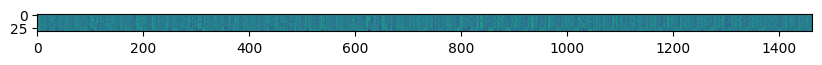

In [421]:
figsize = (10, 10)
plt.figure(figsize=figsize)
plt.imshow(profile_mat.T)

### Load cognitive feature tags

In [464]:
# Load cognitive features
tags = pd.read_csv(
    f'{ut.model_dir}/Atlases/Profiles/tags/tags_final.tsv', sep="\t"
)
# Reduce tags to only MDTB Tasks
tags = tags[tags.dataset == 'MDTB']
# Make condition into index 
tags = tags.set_index('condition')

# Drop everything other than mdtb tags
tags_first_tag_column = tags.columns.tolist().index('left_hand_response_execution')
last_mdtb_tag = tags.columns.tolist().index('right_toe_response_execution')
tags = tags.iloc[:, tags_first_tag_column:last_mdtb_tag]

In [470]:
tags.to_numpy().max()

7.0

In [480]:
tags.response_alternative[-40:]

condition
StroopIncon          4
StroopCon            4
VerbGen              0
WordRead             0
VisualSearchEasy     2
VisualSearchMed      2
VisualSearchDiff     2
Rest                 0
CPRO                 4
Prediction           2
PredictViol          2
PredictScram         2
VerbGen              0
WordRead             0
SpatialNavigation    0
SpatialMapEasy       1
SpatialMapMed        4
SpatialMapDiff       7
NatureMovie          0
RomanceMovie         0
LandscapeMovie       0
FingerSimple         2
FingerSeq            2
MentalRotEasy        2
MentalRotMed         2
MentalRotDiff        2
Object0Back          1
Object2Back          1
BodyMotionIntact     2
BodyMotionScram      2
RespAltEasy          1
RespAltMed           2
RespAltDiff          4
VisualSearchEasy     2
VisualSearchMed      2
VisualSearchDiff     2
ToM                  2
VideoActions         0
VideoKnots           0
Rest                 0
Name: response_alternative, dtype: int64

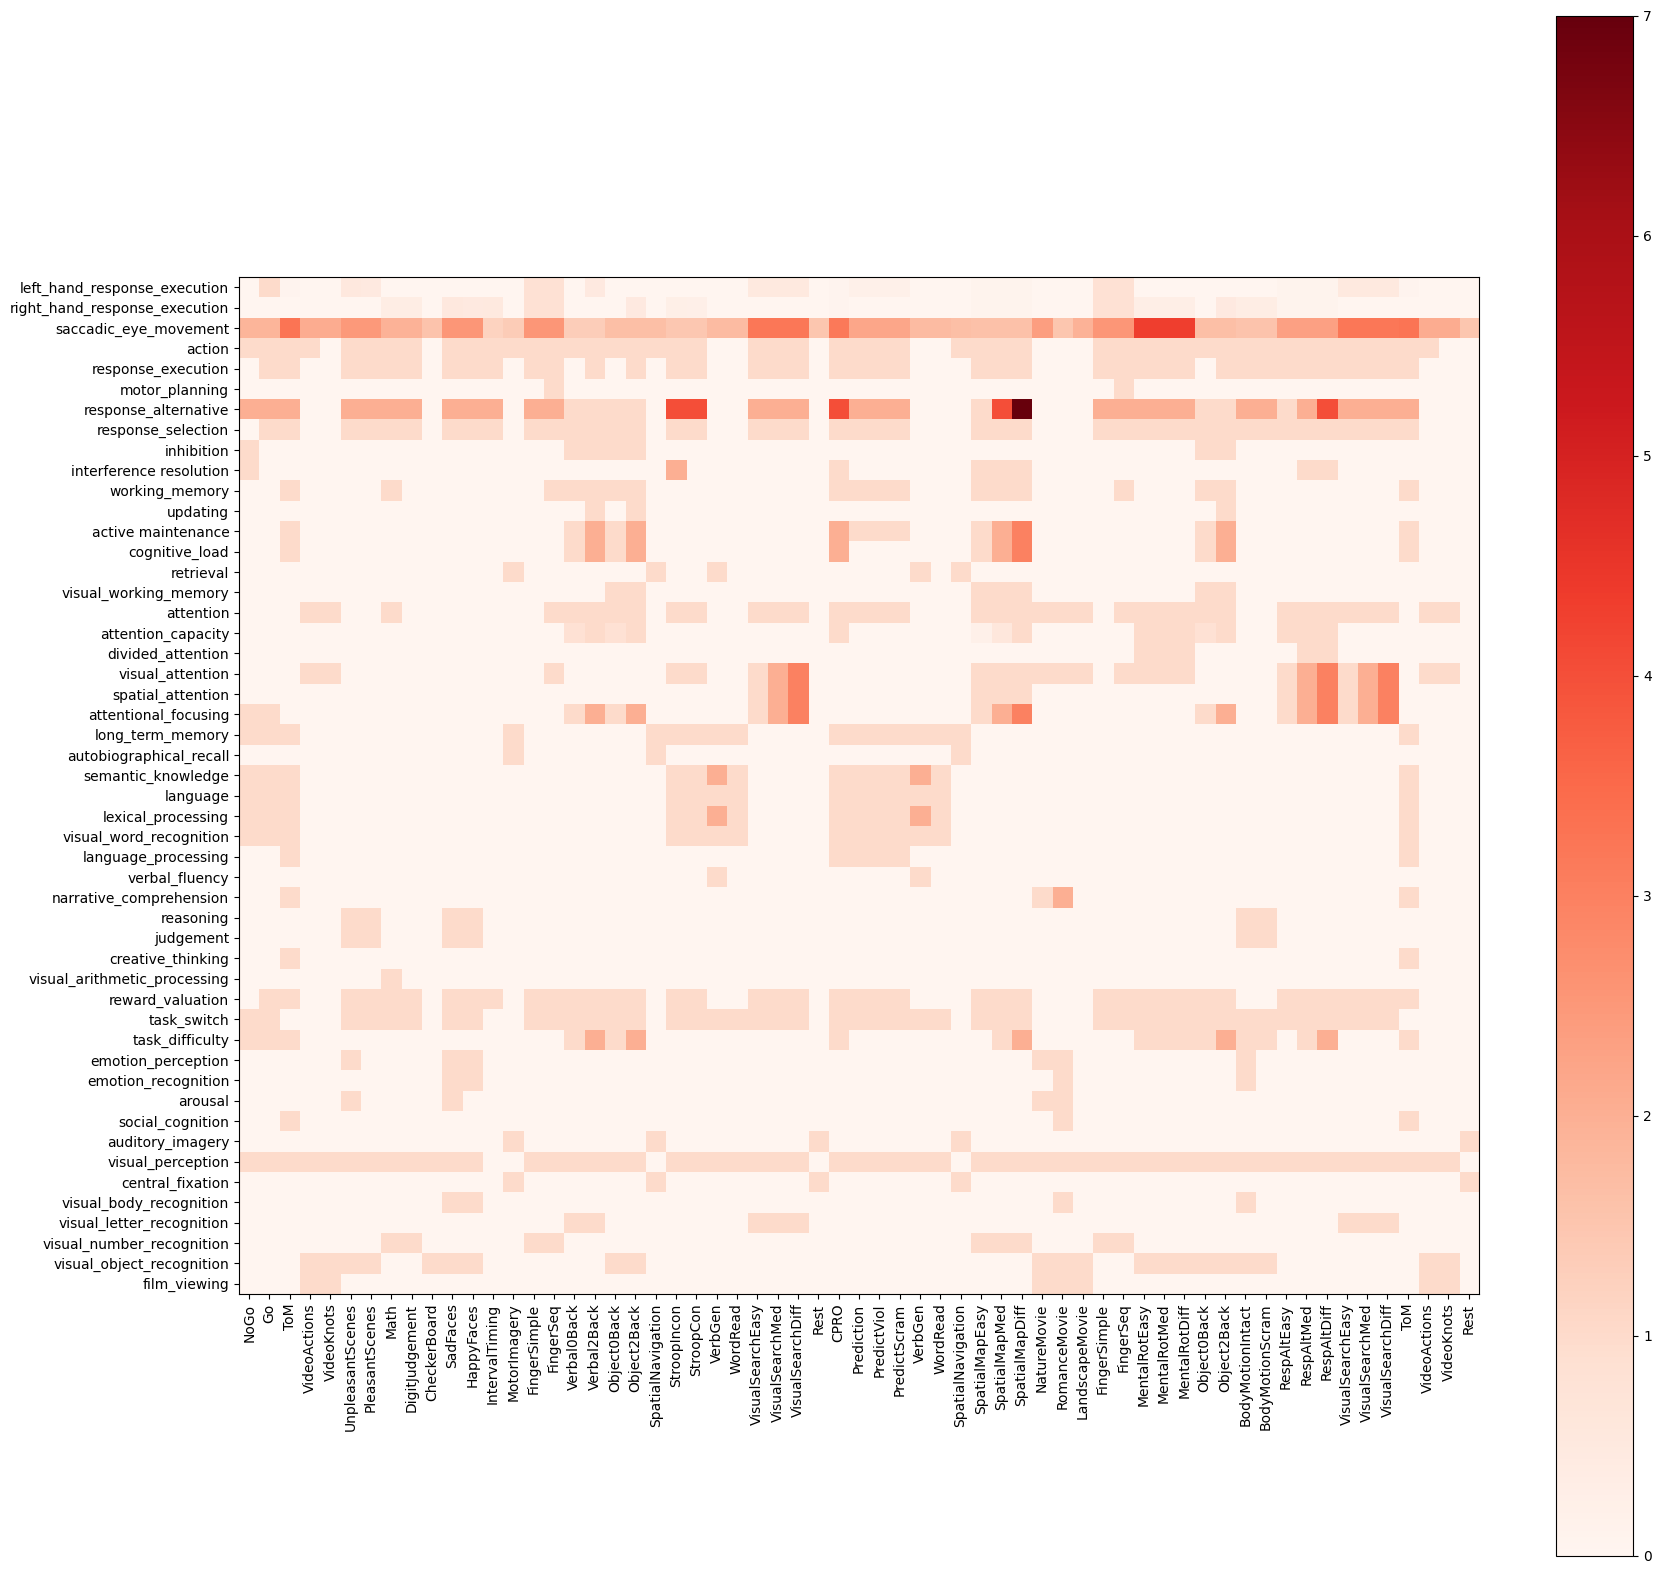

In [473]:
cmap_matrix = plt.get_cmap('Reds')

plt.figure(figsize=(20, 20))
plt.imshow(tags.T, cmap=cmap_matrix)
plt.xticks(range(tags.shape[0]), tags.index.tolist(), rotation=90)
plt.yticks(range(tags.shape[1]), tags.columns.tolist())
plt.colorbar()

In [496]:
# Repeat the tags for each participant
# Loop through the entries of profile.condition and repeat the tags.condition row 
mdtb_new = [
    "VideoAct",
    "VisualSearchSmall",
    "VisualSearchLarge",
    "SpatialMedDiff",
    "rest",
]
mdtb_old = [
    "VideoActions",
    "VisualSearchEasy",
    "VisualSearchMed",
    "SpatialMapDiff",
    "Rest",
]
mdtb_new2old = dict(zip(mdtb_new, mdtb_old))


for i, cond in enumerate(profile_orig.index):
    try:
        row = tags.iloc[tags.index.tolist().index(cond)]
    except:
        row = tags.iloc[tags.index.tolist().index(mdtb_new2old[cond])]
    if i == 0:
        tags_individ = row
    else:
        tags_individ = pd.concat([tags_individ, row], axis=1)




# Subtract mean from tags and divide by Std

In [514]:
# Subtract mean from each column and divide by standard deviation of each column
tags_individ = tags_individ.T
tags_mat = tags_individ.to_numpy()
tags_mat = (tags_mat - np.mean(tags_mat, axis=0)) / np.std(tags_mat, axis=0)

# Plot feature table

([<matplotlib.axis.YTick at 0x7fd39962a6a0>,
 [Text(0, 0, 'NoGo'),
  Text(0, 1, 'Go'),
  Text(0, 2, 'ToM'),
  Text(0, 3, 'VideoAct'),
  Text(0, 4, 'VideoKnots'),
  Text(0, 5, 'UnpleasantScenes'),
  Text(0, 6, 'PleasantScenes'),
  Text(0, 7, 'Math'),
  Text(0, 8, 'DigitJudgement'),
  Text(0, 9, 'CheckerBoard'),
  Text(0, 10, 'SadFaces'),
  Text(0, 11, 'HappyFaces'),
  Text(0, 12, 'IntervalTiming'),
  Text(0, 13, 'MotorImagery'),
  Text(0, 14, 'FingerSimple'),
  Text(0, 15, 'FingerSeq'),
  Text(0, 16, 'Verbal0Back'),
  Text(0, 17, 'Verbal2Back'),
  Text(0, 18, 'Object0Back'),
  Text(0, 19, 'Object2Back'),
  Text(0, 20, 'SpatialNavigation'),
  Text(0, 21, 'StroopIncon'),
  Text(0, 22, 'StroopCon'),
  Text(0, 23, 'VerbGen'),
  Text(0, 24, 'WordRead'),
  Text(0, 25, 'VisualSearchSmall'),
  Text(0, 26, 'VisualSearchMed'),
  Text(0, 27, 'VisualSearchLarge'),
  Text(0, 28, 'rest'),
  Text(0, 29, 'CPRO'),
  Text(0, 30, 'Prediction'),
  Text(0, 31, 'PredictViol'),
  Text(0, 32, 'PredictScram'),


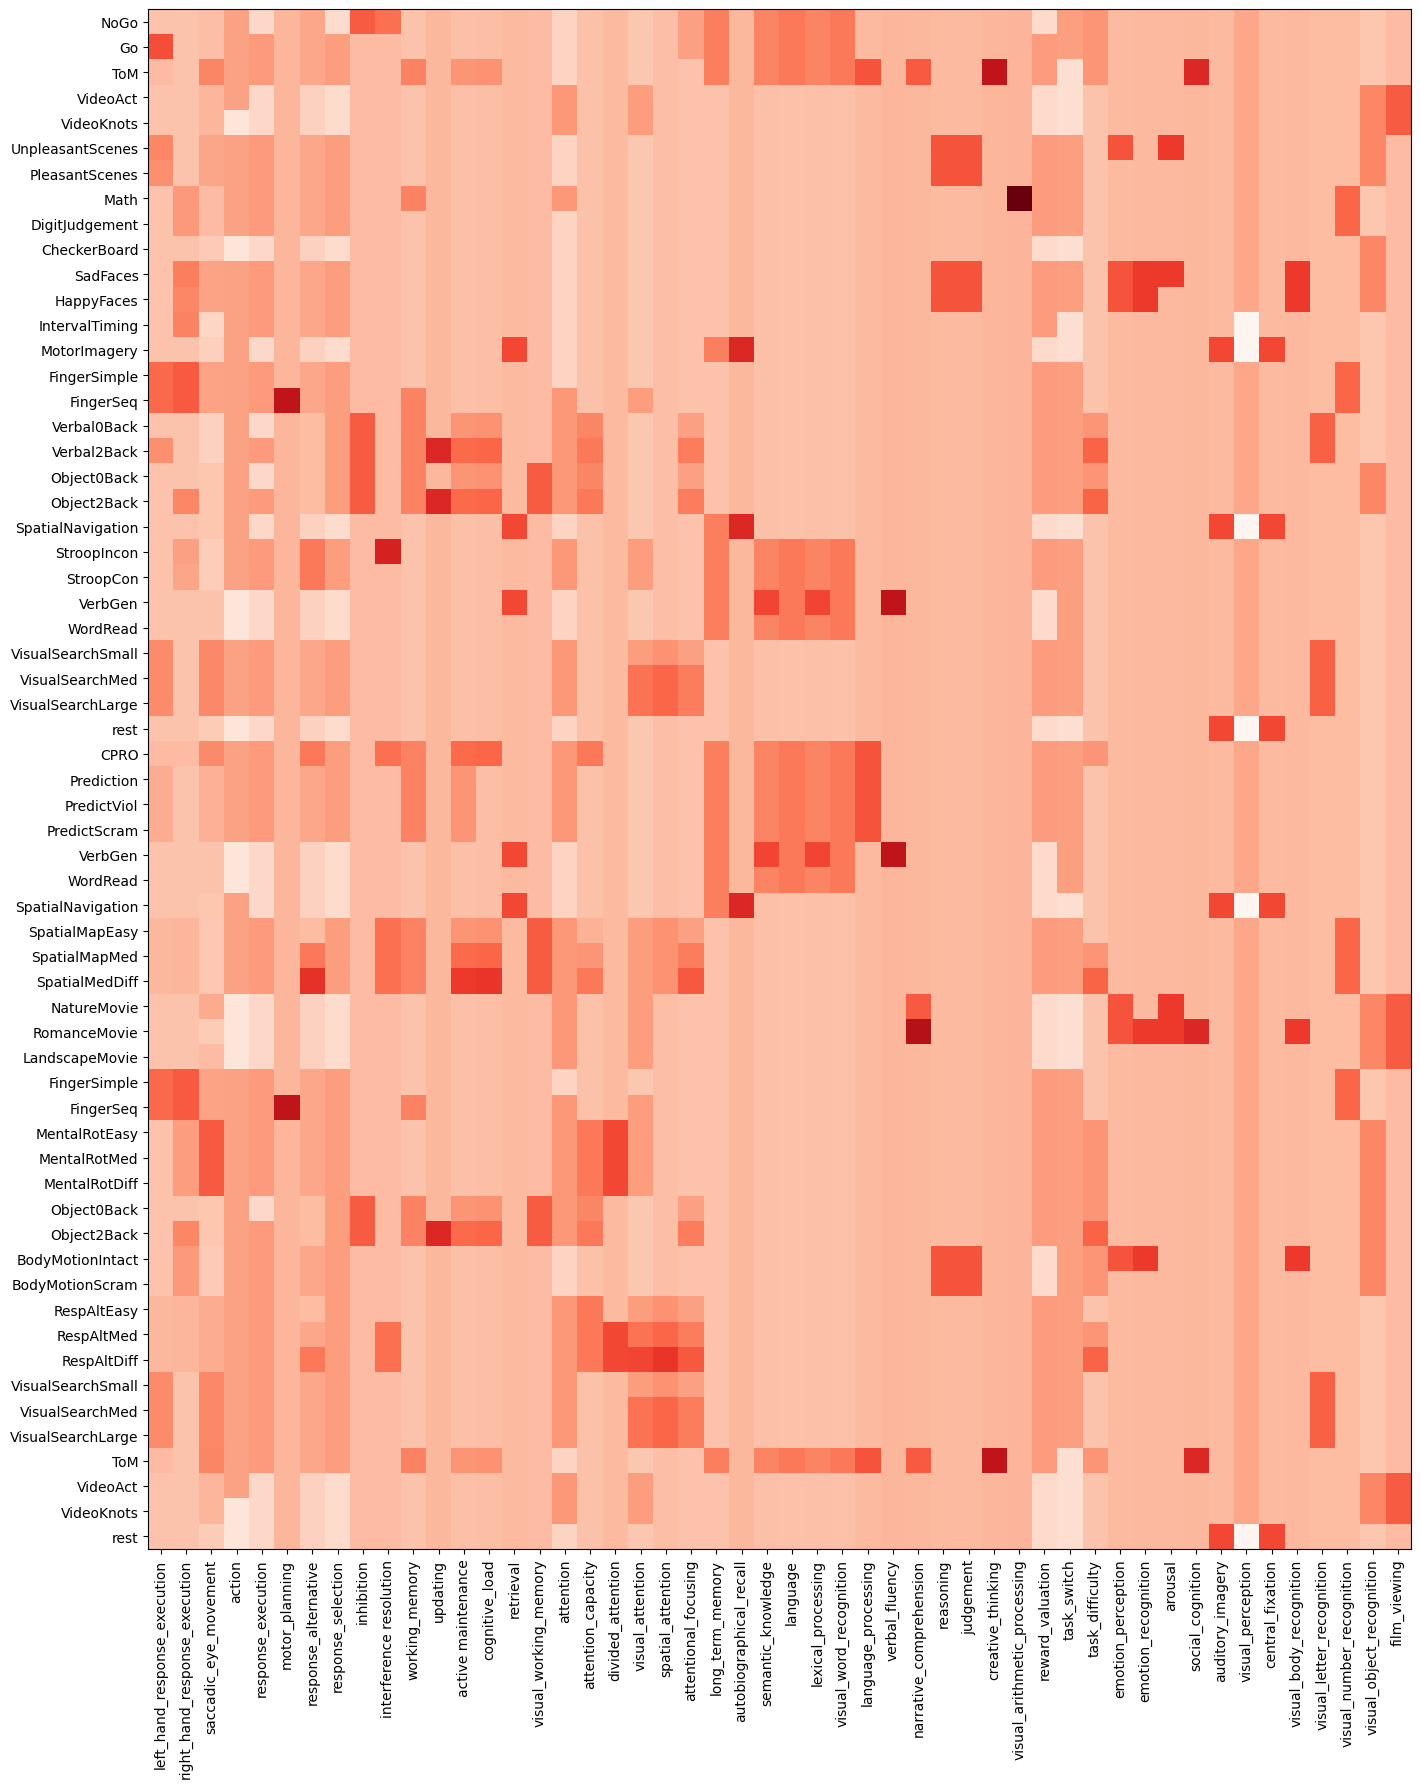

In [523]:
participant='02'
participant_rows = profile_orig.participant_id == f'sub-{participant}'

plt.figure(figsize=(20, 20))
plt.imshow(tags_mat[participant_rows], cmap=cmap_matrix)
plt.xticks(range(tags.shape[1]), tags.columns.tolist(), rotation=90)
plt.yticks(range(profile_orig[participant_rows].shape[0]), profile_orig[participant_rows].index.tolist())
# plt.colorbar()profile_orig

left_hand_response_execution      10.066667
right_hand_response_execution      9.033333
saccadic_eye_movement            134.600000
action                            49.000000
response_execution                40.000000
motor_planning                     2.000000
response_alternative              95.000000
response_selection                43.000000
inhibition                         7.000000
interference resolution            9.000000
working_memory                    18.000000
updating                           3.000000
active maintenance                22.000000
cognitive_load                    19.000000
retrieval                          5.000000
visual_working_memory              7.000000
attention                         37.000000
attention_capacity                14.200000
divided_attention                  5.000000
visual_attention                  35.000000
spatial_attention                 21.000000
attentional_focusing              35.000000
long_term_memory                

In [561]:
# Sum across tasks
tags_sum = tags.sum(axis=0)
# Show tags where the sum is larger than smaller than 2
tags_sum[tags_sum < 5]

motor_planning                  2.0
updating                        3.0
autobiographical_recall         3.0
verbal_fluency                  2.0
creative_thinking               2.0
visual_arithmetic_processing    1.0
emotion_recognition             4.0
arousal                         4.0
social_cognition                3.0
visual_body_recognition         4.0
dtype: float64

# Ridge Regression

In [524]:
R2, features = ridgeFit(profile_mat, tags_mat, fit_intercept=False, voxel_wise=False, alpha=1.0)
# Make dataframe with B values, profile.dataset, profile.condition, tags.columns[tags_first_tag_column:]
Features = pd.DataFrame(features.T, columns=tags.columns, index=labels)



# Plot Tasks

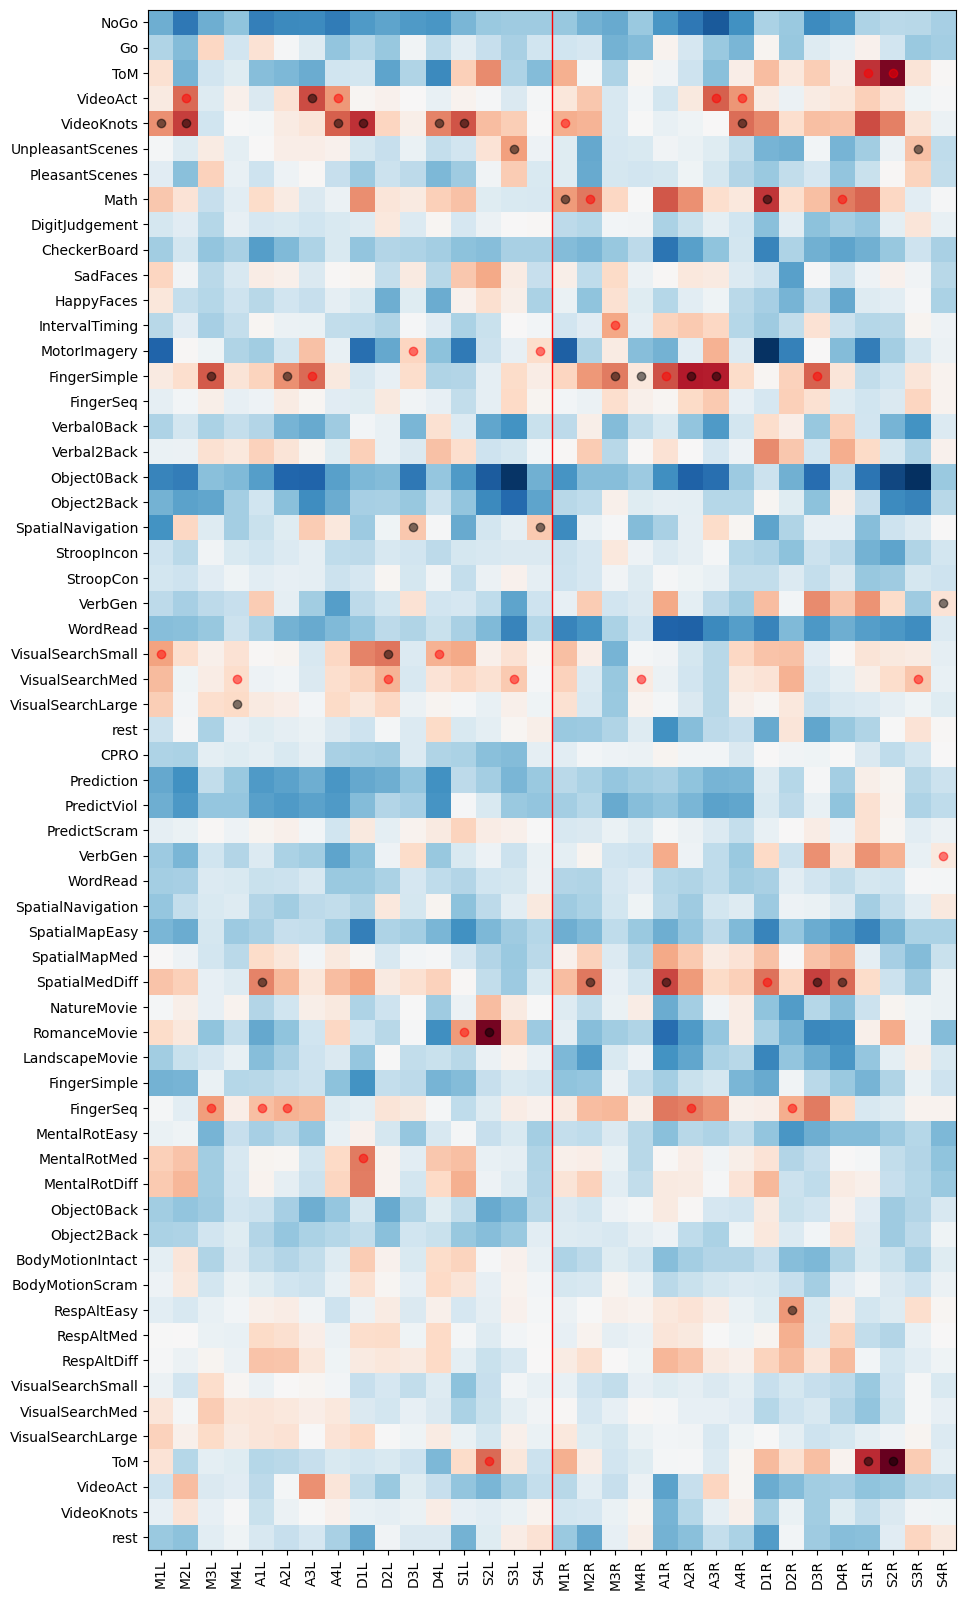

In [526]:
# Get diverging color map from matplotlib
cmap = plt.get_cmap('RdBu_r')
# Plot profile for one participant
participant='02'
tasks = profile[profile_orig.participant_id == f'sub-{participant}'].index

plt.figure(figsize=(20, 20))
plt.imshow(profile_mat[profile_orig.participant_id == f'sub-{participant}'], cmap=cmap)
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(tasks)), tasks)
# Plot a medial line
plt.plot([len(labels)/2-0.5, len(labels)/2-0.5], [-0.5, len(tasks)-0.5], color='red', linewidth=1)

# mark the highest value in each column
n = 2
colors=['red', 'black']
for i in range(profile[profile_orig.participant_id == f'sub-{participant}'].shape[1]):
    # print(labels[i])
    # get the top n profile
    top_n = np.argsort(profile_mat[profile_orig.participant_id == f'sub-{participant}'][:, i])[-n:]
    # plot a dot at the top n profile
    for idx,j in enumerate(top_n):
        plt.plot(i, j, 'o', color=colors[idx], alpha=0.5)
    

# Plot Features

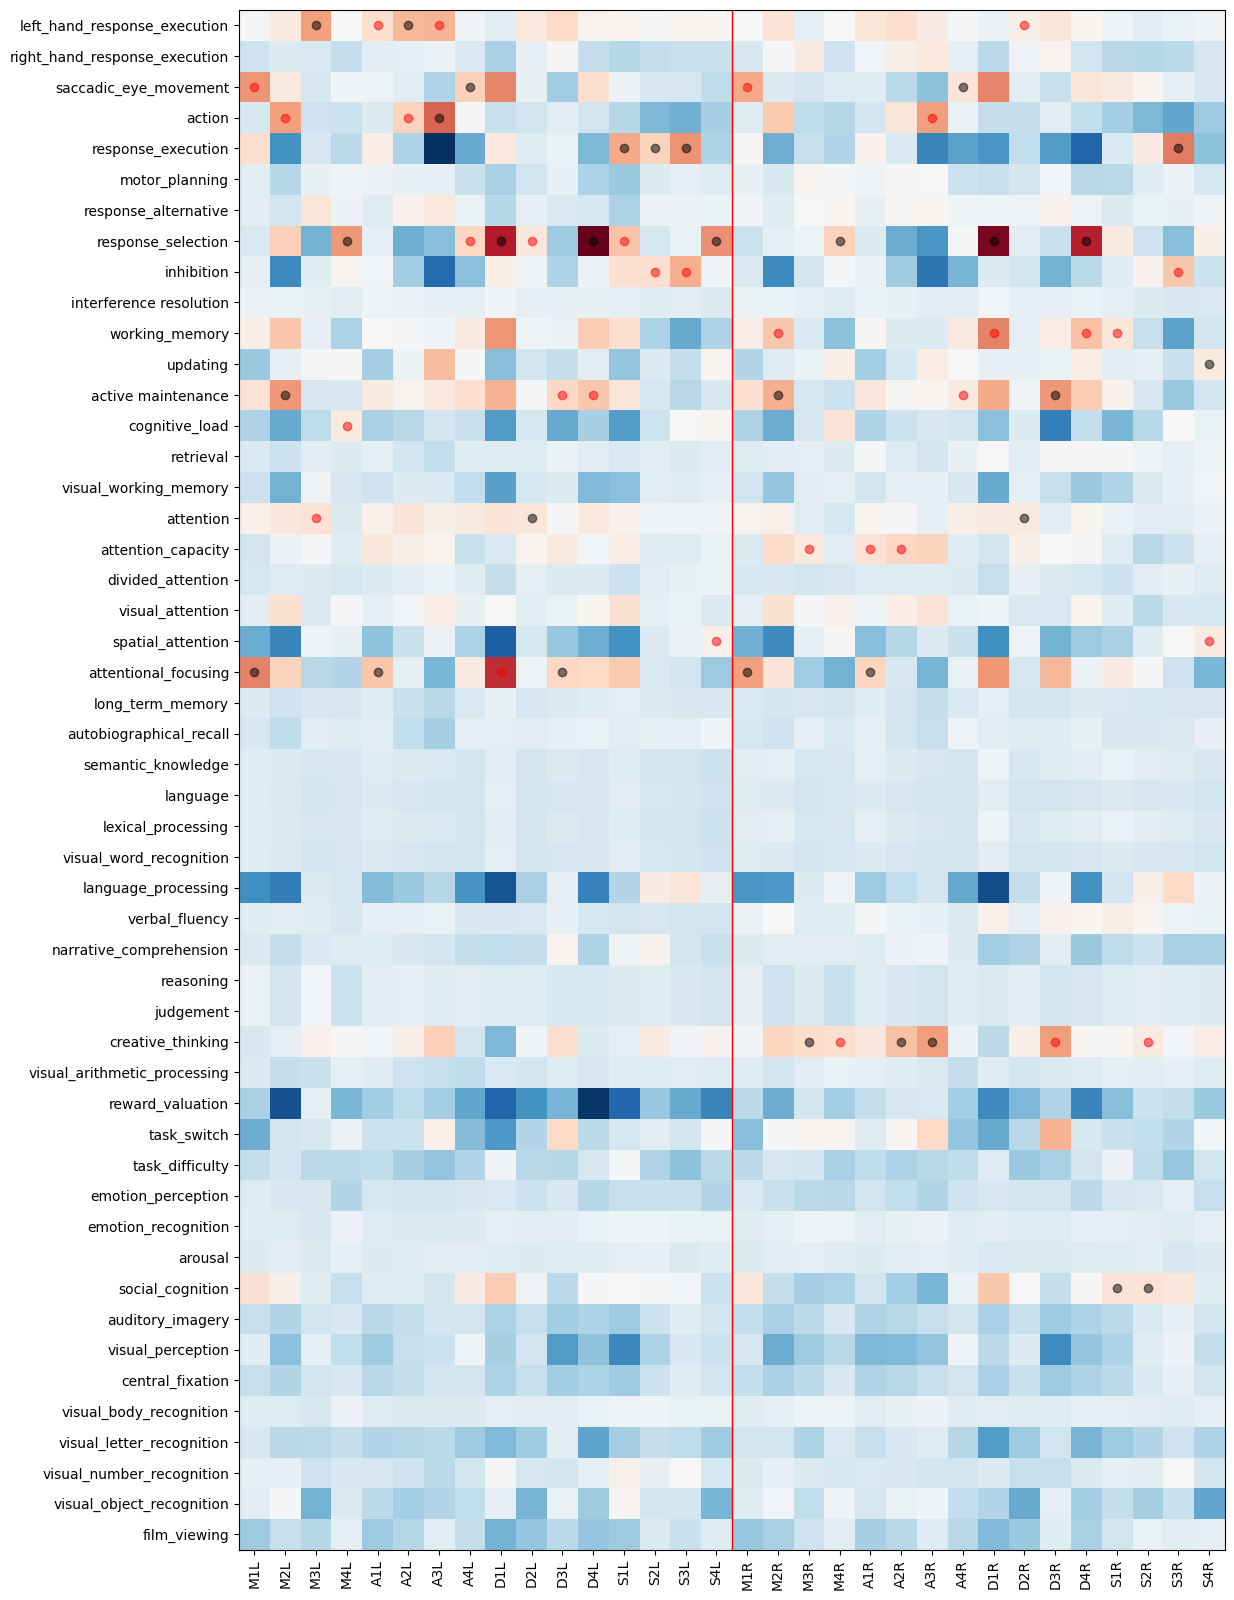

In [527]:
# Plot
plt.figure(figsize=(20, 20))
plt.imshow(features, cmap=cmap)
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(tags.columns)), tags.columns)
# Plot a medial line
plt.plot([len(labels)/2-0.5, len(labels)/2-0.5], [-0.5, len(tags.columns)-0.5], color='red', linewidth=1)

# mark the highest value in each column
colors=['red', 'black']
for i in range(features.shape[1]):
    # print(labels[i])
    # get the top n features
    top_n = np.argsort(features[:, i])[-n:]
    # plot a dot at the top n features
    for idx,j in enumerate(top_n):
        plt.plot(i, j, 'o', color=colors[idx], alpha=0.5)
        # print(tags.columns[j])
    

# Show highest features

In [531]:
def print_tags(profile, df, labels, region=None, n=5):

    for i, r in enumerate(labels):
        if (region is None) | (r == region):
            print(f'\nregion {r}')

            # Sort conditions by score
            scores = profile[:, i]
            zipped = zip(scores, df.columns)
            zipped = sorted(zipped, key=lambda x: x[0], reverse=True)
            scores, conds = zip(*zipped[:n])

            [print(f'{cond}: {score}')
             for score, cond in zip(scores, conds)]


In [534]:
for region in ['M1L', 'M1R']:
    print_tags(features, Features, labels, region=region, n=3)

for region in ['M2L', 'M2R']:
    print_tags(features, Features, labels, region=region, n=3)





region M1L
attentional_focusing: 0.029696646792055394
saccadic_eye_movement: 0.027064767692822657
response_execution: 0.014100662339909418

region M1R
attentional_focusing: 0.02570901586924546
saccadic_eye_movement: 0.024225233627156652
active maintenance: 0.01409273747772823

region M2L
active maintenance: 0.026561781082200104
action: 0.025664898228489996
working_memory: 0.01918824195580848

region M2R
active maintenance: 0.023475376731109183
working_memory: 0.018950220557180403
action: 0.018625428232768984


In [535]:

for region in ['M3L', 'M3R']:
    print_tags(features, Features, labels, region=region, n=2)

for region in ['M4L', 'M4R']:
    print_tags(features, Features, labels, region=region, n=2)


region M3L
left_hand_response_execution: 0.025646668082688985
attention: 0.012874521289749192

region M3R
creative_thinking: 0.014830637747011167
attention_capacity: 0.011033183879538081

region M4L
response_selection: 0.026586619684745808
cognitive_load: 0.010389396407090157

region M4R
response_selection: 0.017206841235496442
creative_thinking: 0.013759845387762447
